In [17]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from utils import *

warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [18]:
# File loading
df = pd.read_excel(r'..\..\Data\Products.xlsx', 'Sheet1')
df.name = 'Products'

In [19]:
# Dataframe head
df.head()

,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
0,2-025,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
1,2-030,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
2,2-035,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
3,2-040,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
4,20-0002,CPK Clog Zapper,CPK Clog Solutions,CPK Clog Solutions,CPK Accessories,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices


,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
0,2-025,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
1,2-030,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
2,2-035,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
3,2-040,KV Adult Access Adapters ET Tube,KIMVENT Adult Access Adapters,Closed Suction KIMVENT Adult Access,VAP Closed Suction Cath Adult,VAP Closed Suction Systems,Med Dev VAP,Medical Devices,Medical Devices
4,20-0002,CPK Clog Zapper,CPK Clog Solutions,CPK Clog Solutions,CPK Accessories,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices


In [20]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 9 columns and 4585 rows.
This dataframe has 9 columns and 4585 rows.


In [21]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product 5-digit Code  4585 non-null   object
 1   P-08                  4585 non-null   object
 2   P-07                  4585 non-null   object
 3   P-06                  4585 non-null   object
 4   P-05                  4585 non-null   object
 5   P-04                  4585 non-null   object
 6   P-03                  4585 non-null   object
 7   P-02                  4585 non-null   object
 8   P-01                  4585 non-null   object
dtypes: object(9)
memory usage: 322.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product 5-digit Code  4585 non-null   object
 1   P-08                  4585 non-null   obj

In [22]:
# Categorical features modalities
modalities_table(df, True)

,Modalities
P-02,2
P-01,2
P-03,9
P-04,20
P-05,42
P-06,111
P-07,256
P-08,576
Product 5-digit Code,4446


,Modalities
P-02,2
P-01,2
P-03,9
P-04,20
P-05,42
P-06,111
P-07,256
P-08,576
Product 5-digit Code,4446


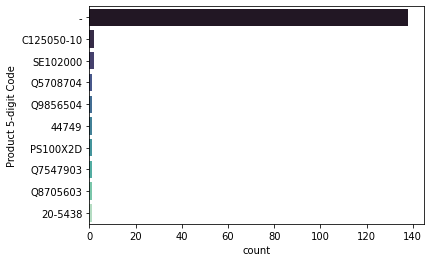

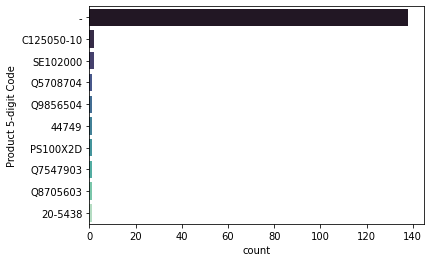

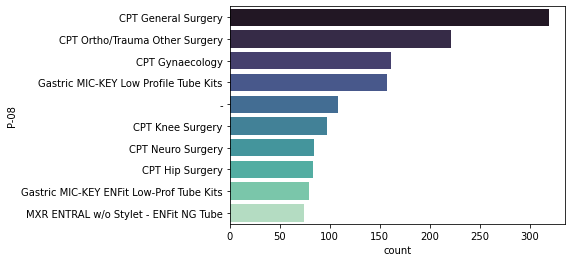

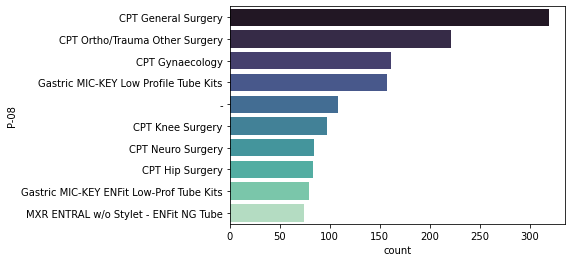

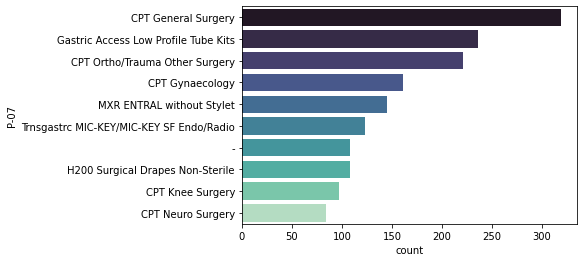

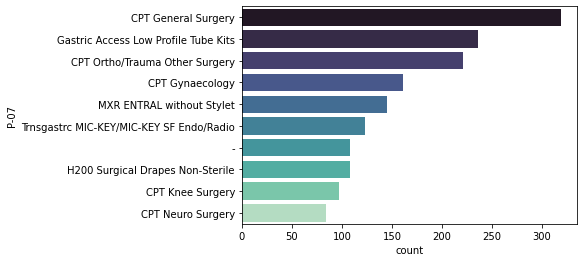

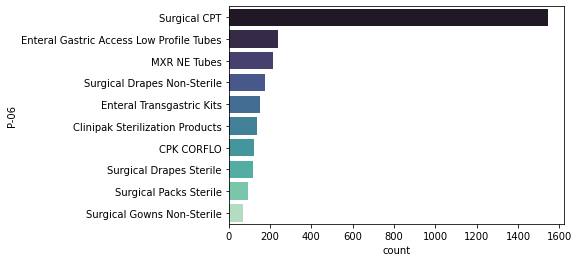

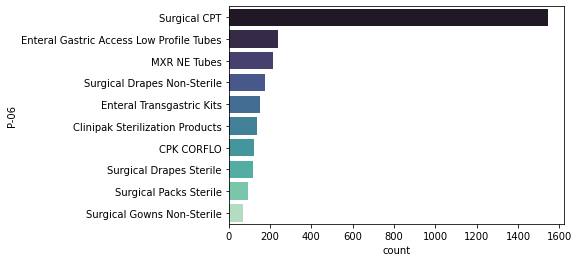

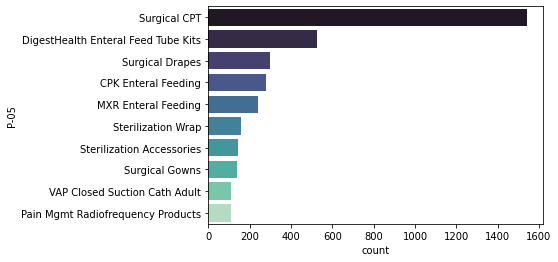

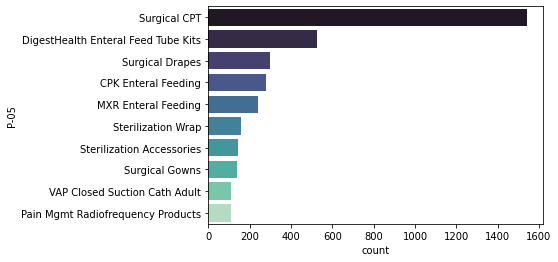

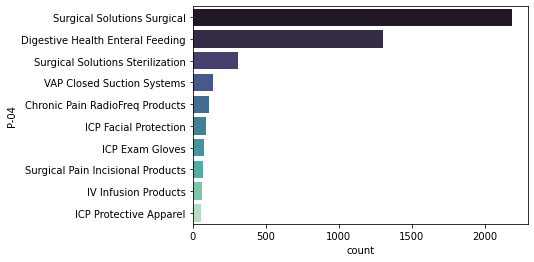

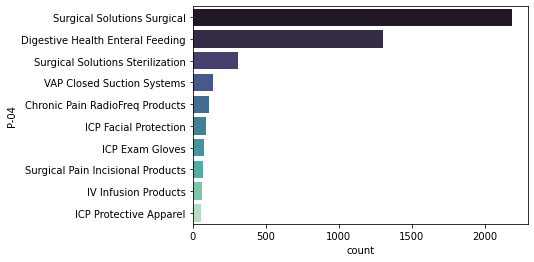

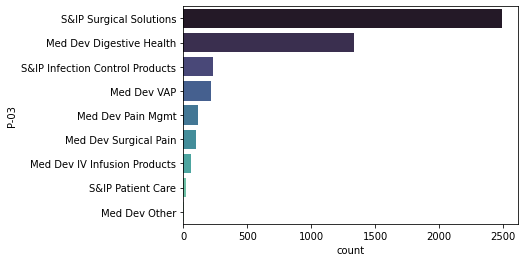

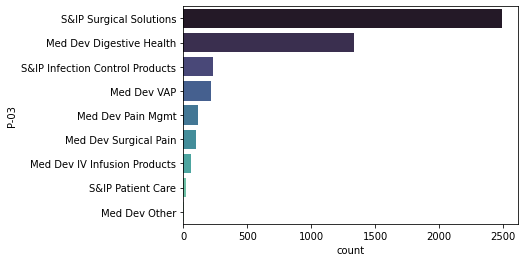

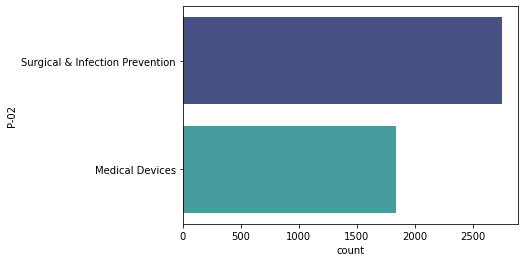

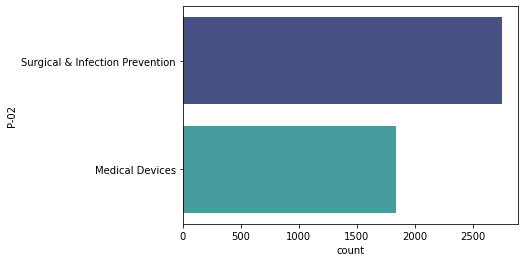

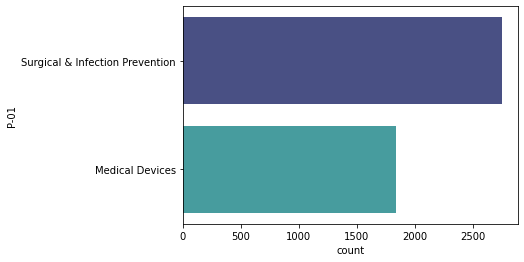

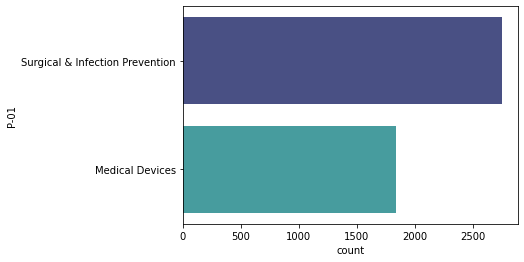

In [23]:
# Distribution of categorical columns except product code
plot_cat_dist(df)

In [24]:
# Missing values are represented by "-"
df[df.eq('-').any(1)]

,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
4447,-,CPK CORFLO w/ Stylet - Ultra NG,CPK CORFLO with Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4448,-,CPK CORFLO w/o Stylet - U LITE ENFit NG,CPK CORFLO without Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4449,-,CPK CORSCOPE/ENDO,CPK CORS,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4450,-,CPK CORTRAK 2 EAS,CPK CORTRAK Enteral Access System,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4451,-,CPK CORTRAK 2 Smart Receiver unit,CPK CORTRAK Accessories,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
...,...,...,...,...,...,...,...,...,...
4580,-,-,-,Surgical Packs Sterile,Surgical Packs,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,-,-,-,Surgical Rolled Goods,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,-,-,-,Surgical Rolled Goods - Royalties,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,-,-,-,VAP Other Accessories,VAP Other Airway Mgmt,VAP Other Airway Mgmt,Med Dev VAP,Medical Devices,Medical Devices


,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
4447,-,CPK CORFLO w/ Stylet - Ultra NG,CPK CORFLO with Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4448,-,CPK CORFLO w/o Stylet - U LITE ENFit NG,CPK CORFLO without Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4449,-,CPK CORSCOPE/ENDO,CPK CORS,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4450,-,CPK CORTRAK 2 EAS,CPK CORTRAK Enteral Access System,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4451,-,CPK CORTRAK 2 Smart Receiver unit,CPK CORTRAK Accessories,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
...,...,...,...,...,...,...,...,...,...
4580,-,-,-,Surgical Packs Sterile,Surgical Packs,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,-,-,-,Surgical Rolled Goods,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,-,-,-,Surgical Rolled Goods - Royalties,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,-,-,-,VAP Other Accessories,VAP Other Airway Mgmt,VAP Other Airway Mgmt,Med Dev VAP,Medical Devices,Medical Devices


In [25]:
# Replacing missing values with None
df.replace({'-': None},inplace=True)
df[df.isnull().any(axis=1)]

,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
4447,None,CPK CORFLO w/ Stylet - Ultra NG,CPK CORFLO with Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4448,None,CPK CORFLO w/o Stylet - U LITE ENFit NG,CPK CORFLO without Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4449,None,CPK CORSCOPE/ENDO,CPK CORS,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4450,None,CPK CORTRAK 2 EAS,CPK CORTRAK Enteral Access System,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4451,None,CPK CORTRAK 2 Smart Receiver unit,CPK CORTRAK Accessories,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
...,...,...,...,...,...,...,...,...,...
4580,None,None,None,Surgical Packs Sterile,Surgical Packs,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,None,None,None,Surgical Rolled Goods,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,None,None,None,Surgical Rolled Goods - Royalties,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,None,None,None,VAP Other Accessories,VAP Other Airway Mgmt,VAP Other Airway Mgmt,Med Dev VAP,Medical Devices,Medical Devices


,Product 5-digit Code,P-08,P-07,P-06,P-05,P-04,P-03,P-02,P-01
4447,None,CPK CORFLO w/ Stylet - Ultra NG,CPK CORFLO with Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4448,None,CPK CORFLO w/o Stylet - U LITE ENFit NG,CPK CORFLO without Stylet,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4449,None,CPK CORSCOPE/ENDO,CPK CORS,CPK CORFLO,CPK Enteral Feeding,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4450,None,CPK CORTRAK 2 EAS,CPK CORTRAK Enteral Access System,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
4451,None,CPK CORTRAK 2 Smart Receiver unit,CPK CORTRAK Accessories,CPK CORTRAK Hardware,CPK Hardware,Digestive Health Enteral Feeding,Med Dev Digestive Health,Medical Devices,Medical Devices
...,...,...,...,...,...,...,...,...,...
4580,None,None,None,Surgical Packs Sterile,Surgical Packs,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,None,None,None,Surgical Rolled Goods,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,None,None,None,Surgical Rolled Goods - Royalties,Surgical Rolled Goods,Surgical Solutions Surgical,S&IP Surgical Solutions,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,None,None,None,VAP Other Accessories,VAP Other Airway Mgmt,VAP Other Airway Mgmt,Med Dev VAP,Medical Devices,Medical Devices


In [26]:
# Missing value summary
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.
Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Product 5-digit Code,138,3.01
P-08,108,2.36
P-07,108,2.36


,Missing Values,% of Total Values
Product 5-digit Code,138,3.01
P-08,108,2.36
P-07,108,2.36


In [27]:
# Missing values export
save_missing_values_table(df, df.name)

In [28]:
# Categorical features modalities
modalities_table(df, True)

,Modalities
P-02,2
P-01,2
P-03,9
P-04,20
P-05,42
P-06,111
P-07,255
P-08,575
Product 5-digit Code,4445


,Modalities
P-02,2
P-01,2
P-03,9
P-04,20
P-05,42
P-06,111
P-07,255
P-08,575
Product 5-digit Code,4445


There is 4445 product.

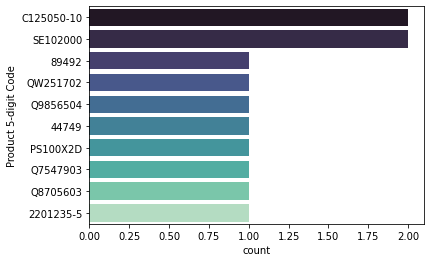

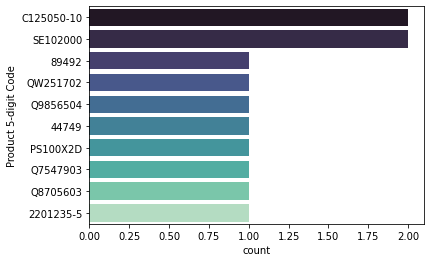

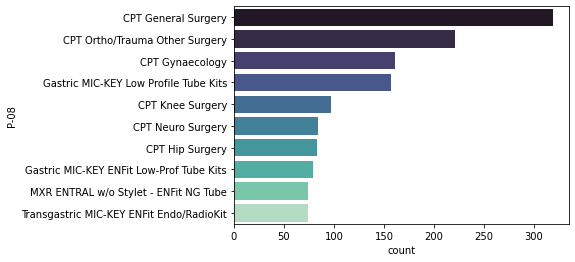

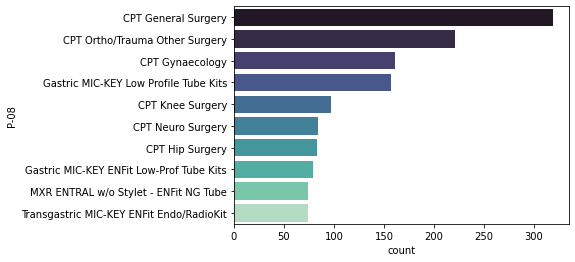

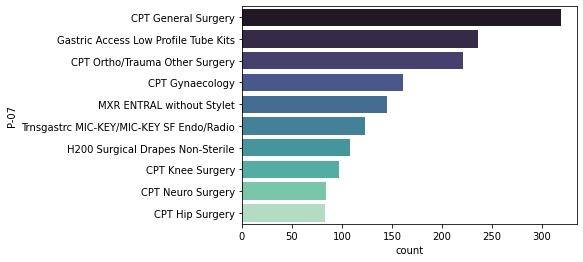

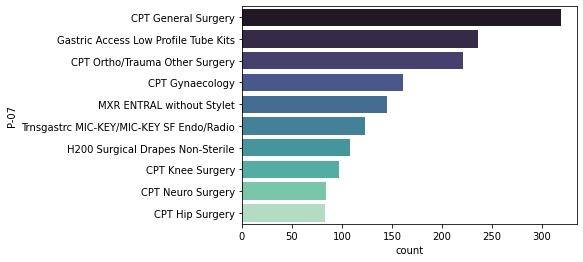

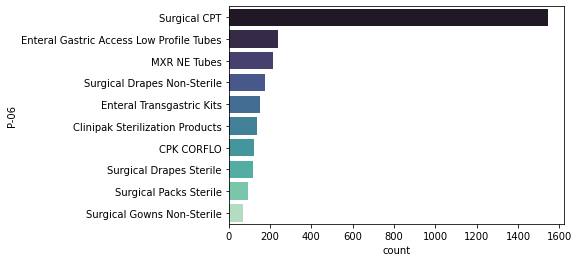

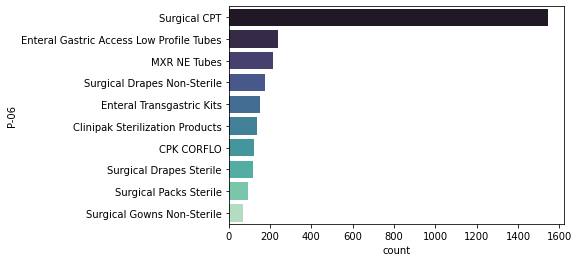

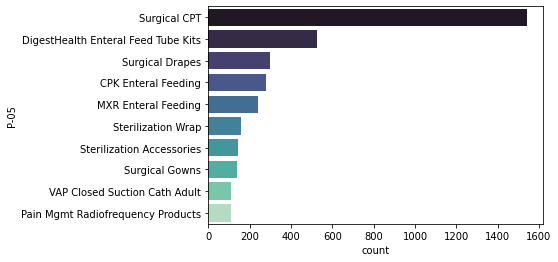

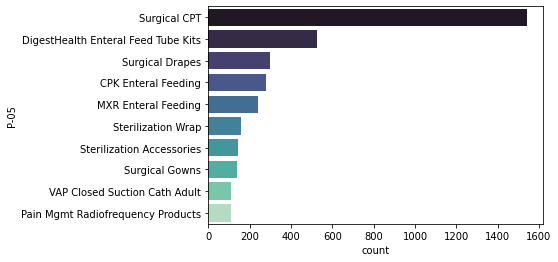

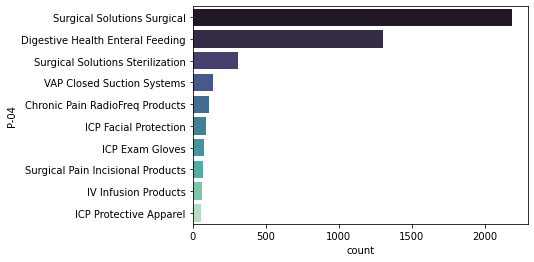

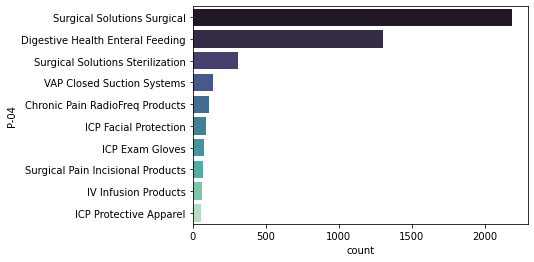

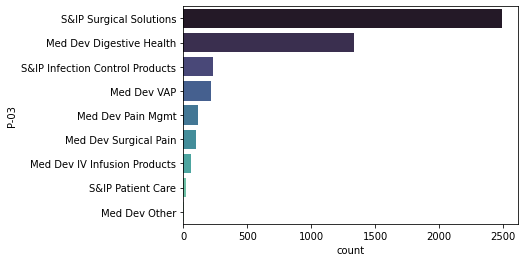

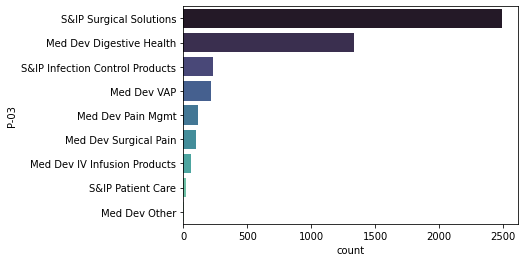

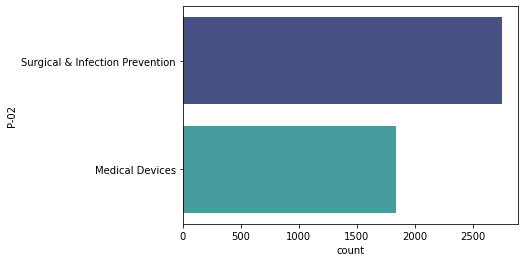

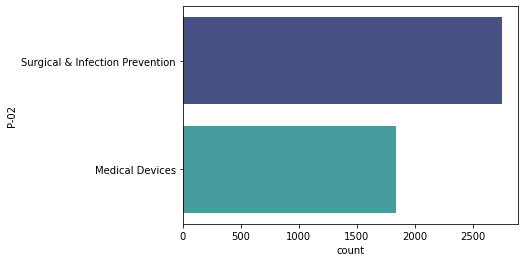

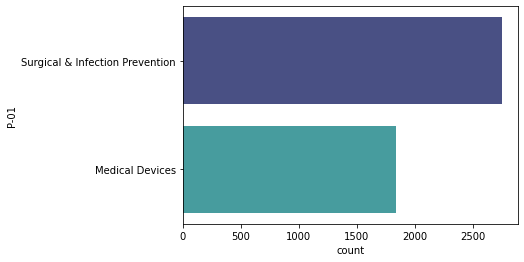

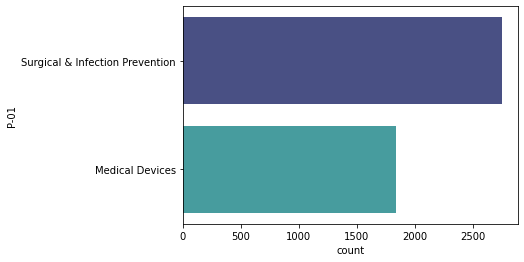

In [29]:
# Distribution of categorical columns        
plot_cat_dist(df)

The most frequent products in this table are **Surgical products**.

In [30]:
# Check if column P01 and P02 are similar
df_same = df[df.iloc[:,-1].eq(df.iloc[:,-2])].iloc[:,-2:]
df_same

,P-02,P-01
0,Medical Devices,Medical Devices
1,Medical Devices,Medical Devices
2,Medical Devices,Medical Devices
3,Medical Devices,Medical Devices
4,Medical Devices,Medical Devices
...,...,...
4580,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,Medical Devices,Medical Devices


,P-02,P-01
0,Medical Devices,Medical Devices
1,Medical Devices,Medical Devices
2,Medical Devices,Medical Devices
3,Medical Devices,Medical Devices
4,Medical Devices,Medical Devices
...,...,...
4580,Surgical & Infection Prevention,Surgical & Infection Prevention
4581,Surgical & Infection Prevention,Surgical & Infection Prevention
4582,Surgical & Infection Prevention,Surgical & Infection Prevention
4583,Medical Devices,Medical Devices


In [31]:
# Save data that contains similarities
save_values_table(df_same, 'Products', 'similarity')

The columns **P-01** and **P-02** are similar.

In [32]:
for c in df.select_dtypes(['object']).columns:
    print(c + ' VARCHAR(%d),' % max(df[c].str.len()))

Product 5-digit Code VARCHAR(17),
P-08 VARCHAR(40),
P-07 VARCHAR(40),
P-06 VARCHAR(40),
P-05 VARCHAR(40),
P-04 VARCHAR(33),
P-03 VARCHAR(31),
P-02 VARCHAR(31),
P-01 VARCHAR(31),
Product 5-digit Code VARCHAR(17),
P-08 VARCHAR(40),
P-07 VARCHAR(40),
P-06 VARCHAR(40),
P-05 VARCHAR(40),
P-04 VARCHAR(33),
P-03 VARCHAR(31),
P-02 VARCHAR(31),
P-01 VARCHAR(31),


## The product dimension should be in this schema :
<br/>
[ID] [int] IDENTITY(1,1) NOT NULL,<br/>
Product_ID VARCHAR(17) NOT NULL,<br/>
P08 VARCHAR(40) NOT NULL,<br/>
P07 VARCHAR(40),<br/>
P06 VARCHAR(40),<br/>
P05 VARCHAR(40),<br/>
P04 VARCHAR(33),<br/>
P03 VARCHAR(31),<br/>
P02 VARCHAR(31)